<a href="https://colab.research.google.com/github/DinhCongNgoc/AI/blob/main/Ex1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np #Khai báo thư viện Numpy là np
import os #Đọc địa chỉ ảnh
from PIL import Image #Xử lý vẽ ảnh
import matplotlib.pyplot as plt # thư viện dùng để vẽ
from keras.models import Sequential # hàm chạy mô hình
from keras.layers import Dense,Activation,Dropout # tạo mạng nơ ron
from tensorflow.keras.optimizers import RMSprop # tạo thuật toán training
from keras.callbacks import EarlyStopping #dừng training khi models training không hiệu quả
from keras.backend import categorical_crossentropy 

In [ ]:
#Khai báo biến đọc địa chỉ
train_data ='drive/MyDrive/Baitapvenha/training'
validation_data='drive/MyDrive/Baitapvenha/validation'
test_data='drive/MyDrive/Baitapvenha/test'

In [ ]:
listdata_train=[]
listdata_validation=[]
listdata_test=[]
dict={'Bao':[0],'Ngoc':[1],'Nhat':[2]}

In [ ]:
def Getdata(dirdata,lstdata):
#Đọc hình ảnh trong tập dữ liệu
  for whatever in os.listdir(dirdata):
      whatever_path = os.path.join(dirdata,whatever)
      lst_filename_path=[]
      for filename in os.listdir(whatever_path):
        filename_path=os.path.join(whatever_path,filename)
        label=filename_path.split('/')[4]
        img = np.array(Image.open(filename_path))
        lst_filename_path.append((img,dict[label]))
      lstdata.extend(lst_filename_path)
  for i in range(3):
      np.random.shuffle(lstdata)
  return lstdata

In [ ]:
listdata_train=Getdata(train_data,listdata_train)
listdata_test=Getdata(test_data,listdata_test)
listdata_validation=Getdata(validation_data,listdata_validation)

In [ ]:
x_train=np.array([x[0] for _ ,x in enumerate(listdata_train)])
y_train=np.array([y[1] for _ ,y in enumerate(listdata_train)])
y_train.shape

(90, 1)

In [ ]:
x_test=np.array([x[0] for _ ,x in enumerate(listdata_test)])
y_test=np.array([y[1] for _ ,y in enumerate(listdata_test)])

In [ ]:
x_validation=np.array([x[0] for _ ,x in enumerate(listdata_validation)])
y_validation=np.array([y[1] for _ ,y in enumerate(listdata_validation)])
x_validation.shape

(4, 256, 256, 3)

In [ ]:
yname=y_train.flatten()

In [ ]:
class_names=['Bao','Ngoc','Nhat']
x_pre=x_test
y_pre=y_test
y_pre

array([[2],
       [1],
       [0],
       [1],
       [2],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [2],
       [1],
       [0],
       [2],
       [0],
       [0],
       [0],
       [2],
       [0],
       [0],
       [2],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [0],
       [1],
       [0],
       [2],
       [1],
       [0],
       [2],
       [1],
       [1],
       [2],
       [0],
       [0],
       [0],
       [1],
       [2],
       [1],
       [1],
       [1],
       [1],
       [2],
       [2],
       [0],
       [1],
       [1],
       [0],
       [2],
       [0],
       [2],
       [2]])

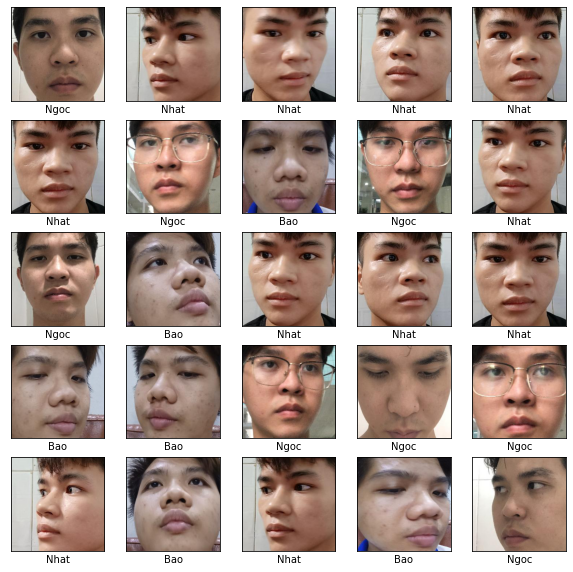

In [ ]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_train[i], cmap='binary')
    plt.xlabel(class_names[yname[i]])
plt.show()

In [ ]:
from keras.utils import np_utils
x_train=x_train.reshape(90,196608)
x_test=x_test.reshape(57,196608)
x_validation=x_validation.reshape(4,196608)
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_validation=x_validation.astype('float32')
x_train/=255
x_test/=255
x_validation/=255
y_train=np_utils.to_categorical(y_train,3)
y_test= np_utils.to_categorical(y_test,3)
y_validation= np_utils.to_categorical(y_validation,3)

In [ ]:
model=Sequential()
model.add(Dense(1000,activation='relu',input_shape=(196608,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3,activation='softmax'))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 1000)              196609000 
                                                                 
 dense_28 (Dense)            (None, 512)               512512    
                                                                 
 dropout_9 (Dropout)         (None, 512)               0         
                                                                 
 dense_29 (Dense)            (None, 3)                 1539      
                                                                 
Total params: 197,123,051
Trainable params: 197,123,051
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
history=model.fit(x_train,y_train,batch_size=90,epochs=120,verbose=1,validation_data=(x_validation,y_validation)) 

Epoch 1/120
1/1 [==============================] - 3s 3s/step - loss: 1.2474 - accuracy: 0.3333 - val_loss: 379.9398 - val_accuracy: 0.2500
Epoch 2/120
1/1 [==============================] - 2s 2s/step - loss: 357.8447 - accuracy: 0.3333 - val_loss: 173.5641 - val_accuracy: 0.2500
Epoch 3/120
1/1 [==============================] - 2s 2s/step - loss: 204.0969 - accuracy: 0.3333 - val_loss: 227.0210 - val_accuracy: 0.5000
Epoch 4/120
1/1 [==============================] - 2s 2s/step - loss: 369.9051 - accuracy: 0.3333 - val_loss: 133.8459 - val_accuracy: 0.5000
Epoch 5/120
1/1 [==============================] - 2s 2s/step - loss: 219.7779 - accuracy: 0.3333 - val_loss: 63.7374 - val_accuracy: 0.2500
Epoch 6/120
1/1 [==============================] - 2s 2s/step - loss: 70.1004 - accuracy: 0.4222 - val_loss: 142.3350 - val_accuracy: 0.5000
Epoch 7/120
1/1 [==============================] - 2s 2s/step - loss: 122.9309 - accuracy: 0.3222 - val_loss: 163.7585 - val_accuracy: 0.5000
Epoch 8/12

In [ ]:
Score=model.evaluate(x_test,y_test,verbose=0)
print('Test loss',Score[0])
print('Test accuary', Score[1])

Test loss 8.54961109161377
Test accuary 0.7543859481811523


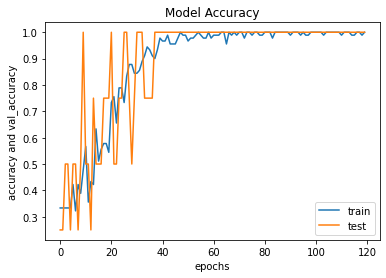

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy and val_accuracy')
plt.xlabel('epochs')
plt.legend(['train','test'])
plt.show()

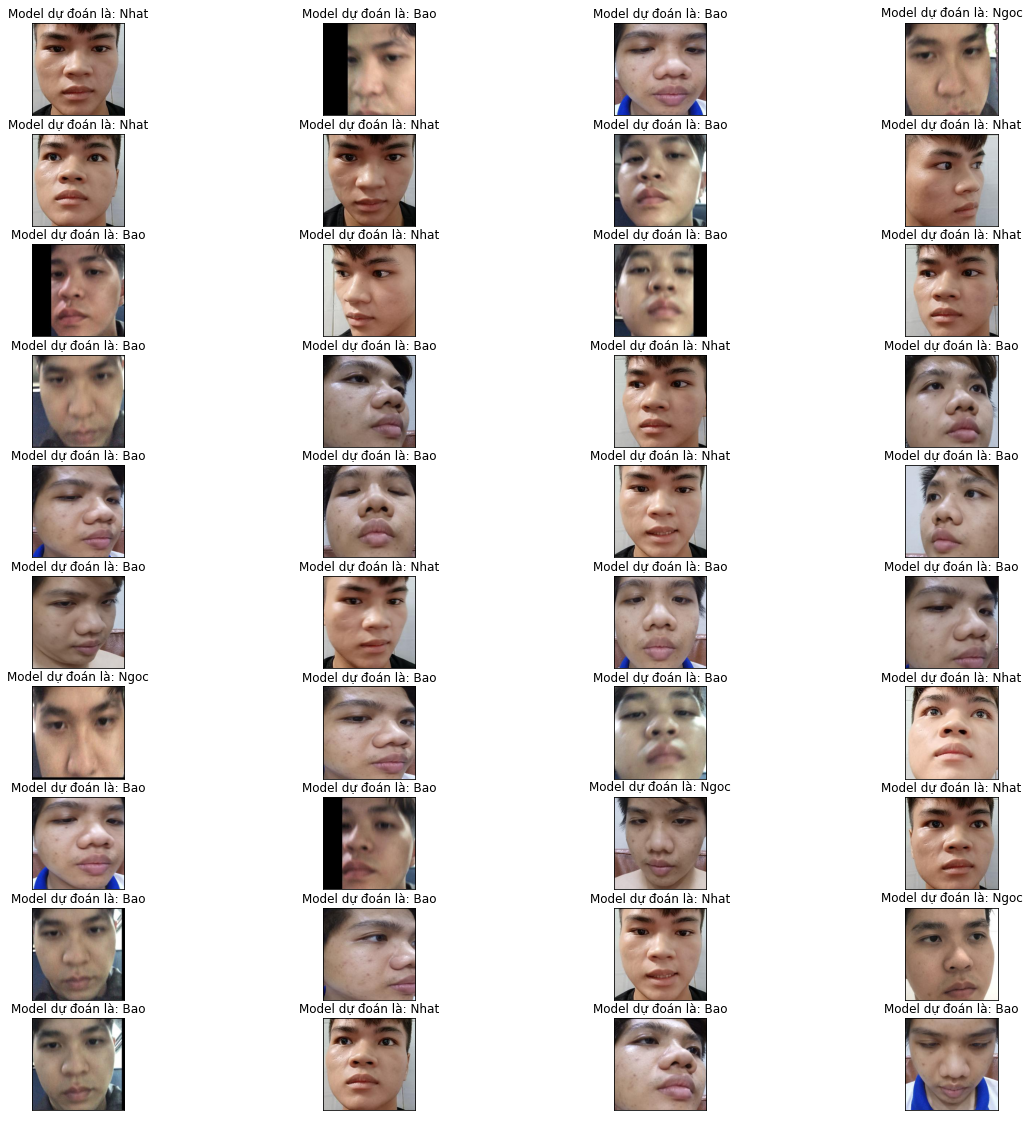

In [ ]:
plt.figure(figsize=(20, 20))
for i in range(40):
    plt.subplot(10, 4, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(x_pre[i], cmap='binary')
    plt.title("Model dự đoán là: " + str(class_names[np.argmax(model.predict(x_pre[i].reshape((-1,196608))))]))
plt.show()